## Import Libraries :

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

 ## Load the Dataset:

In [16]:
data = pd.read_csv('bank.csv', sep=';')

## Exploratory data analysis:

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [19]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Data Visualization:

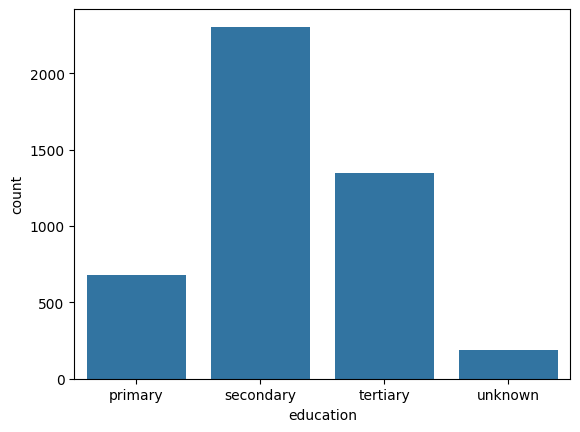

In [20]:
sns.countplot(x='education', data=data)
plt.show()

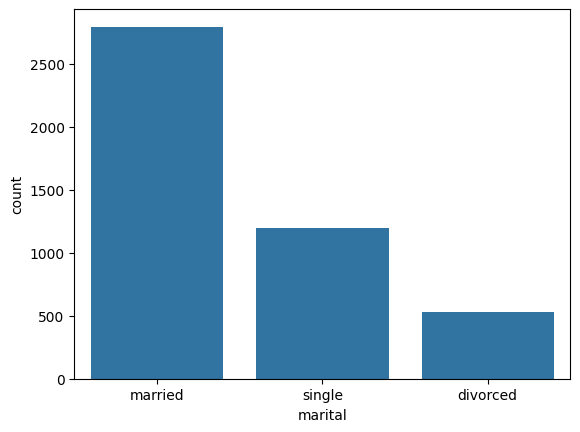

In [21]:
sns.countplot(x='marital', data=data)
plt.show()

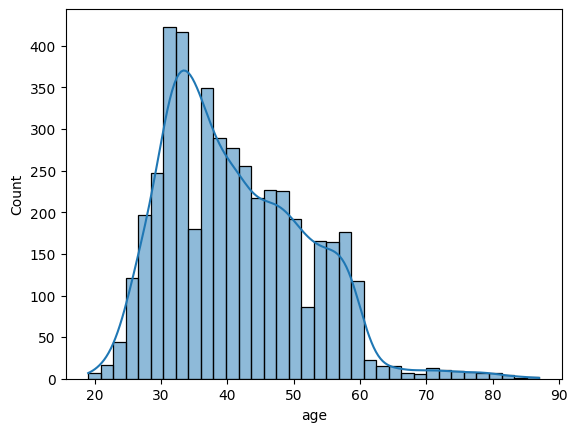

In [22]:
sns.histplot(data['age'], kde=True)
plt.show()

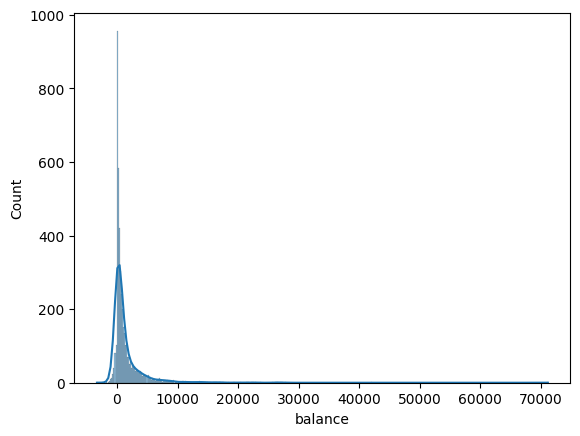

In [23]:
sns.histplot(data['balance'], kde=True)
plt.show()

## Data Preprocessing:

In [24]:
#Convert categorical columns to numerical values using `LabelEncoder`.
le = LabelEncoder()

for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    data[col] = le.fit_transform(data[col])

## Feature and target separation:

In [25]:
# Target variable 'y' ko binary (0 aur 1) mein convert karna
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Features aur target variable ko alag karna
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

## Test train split:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Scaling:

In [28]:
# Scale features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and evaluation:

In [29]:
clf = DecisionTreeClassifier()

# Model ko train karna
clf.fit(X_train, y_train)

# Predictions karna
y_pred = clf.predict(X_test)

# Accuracy check karna
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 86.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.37      0.37       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357

Confusion Matrix:
[[1113   92]
 [  96   56]]


## Model Optimization with Pruning:

In [33]:
# Create a decision tree with pre-pruning parameters
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

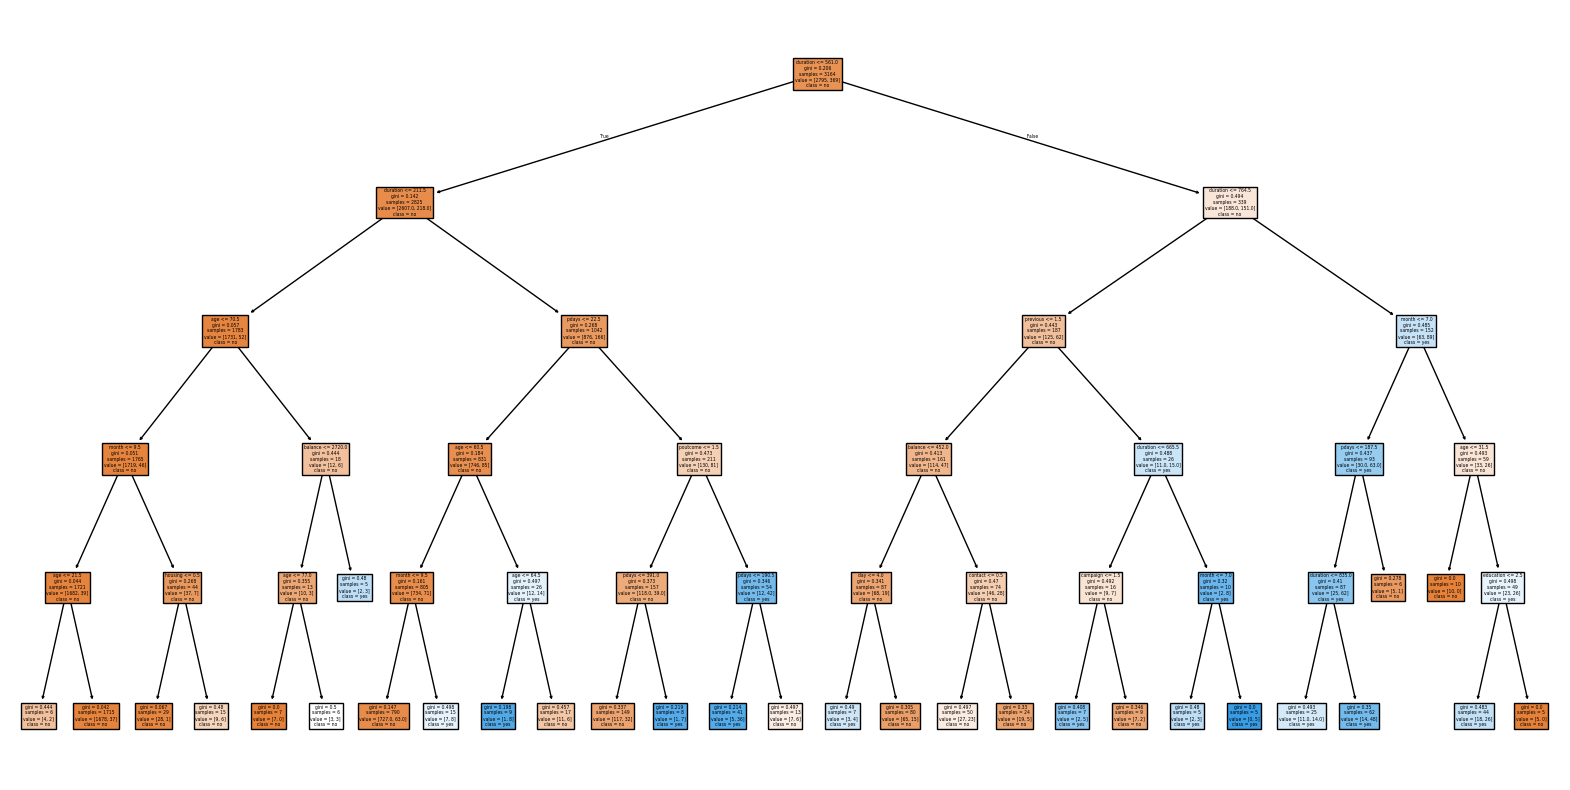

In [34]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

- **Key Features:** The top nodes show the most important features for predictions.
- **Tree Complexity:** The depth suggests detailed decision-making, which might lead to overfitting.
- **Class Separation:** Colors indicate how well the tree distinguishes between classes.